In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



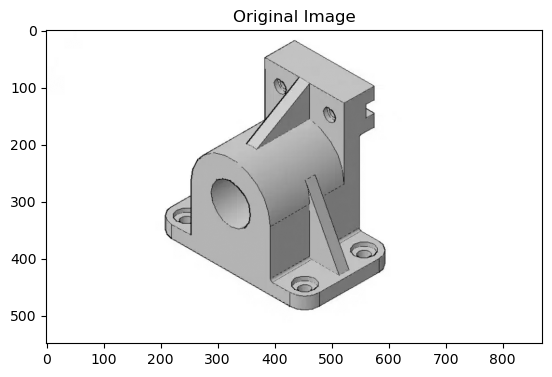

In [4]:
# Read image in grayscale
img = cv2.imread("assets/3d_drawings.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.resize(img, (200, 200))  # make it smaller for demo

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

In [5]:
# Example: simple averaging kernel (3x3 blur)
kernel = np.ones((3,3), np.float32) / 9

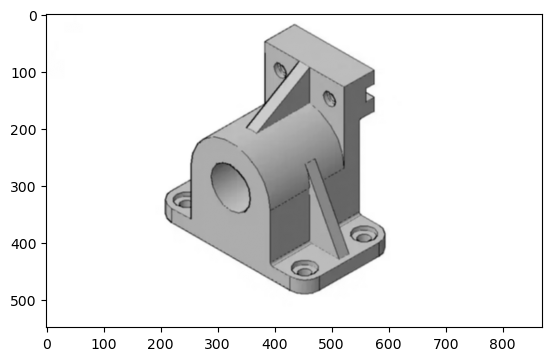

In [18]:
y_original = cv2.filter2D(img, -1, kernel)
plt.imshow(y_original, cmap = 'gray')

In [14]:
# Shift right by 20 pixels, down by 10 pixels
img_shifted = np.roll(np.roll(img, 10, axis=0), 200, axis=1)

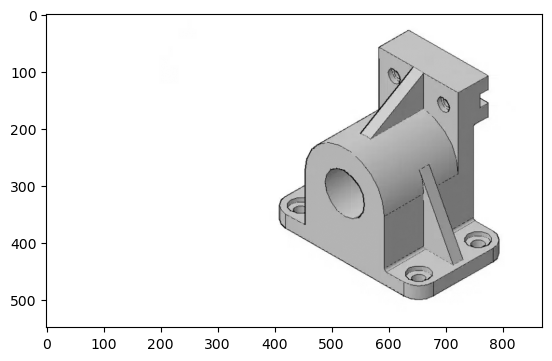

In [15]:
plt.imshow(img_shifted, cmap ='gray')

In [19]:
y_shifted_input = cv2.filter2D(img_shifted, -1, kernel)

In [20]:
y_original_then_shifted = np.roll(np.roll(y_original, 10, axis=0), 20, axis=1)


Are they equal (LSI property)? False


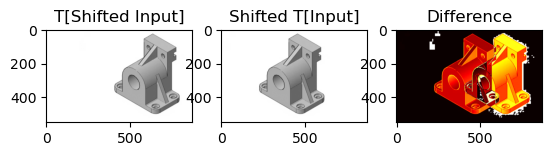

In [21]:
print("Are they equal (LSI property)?", 
      np.allclose(y_shifted_input, y_original_then_shifted, atol=1e-6))

# Show images
plt.subplot(1,3,1), plt.imshow(y_shifted_input, cmap="gray"), plt.title("T[Shifted Input]")
plt.subplot(1,3,2), plt.imshow(y_original_then_shifted, cmap="gray"), plt.title("Shifted T[Input]")
plt.subplot(1,3,3), plt.imshow(np.abs(y_shifted_input - y_original_then_shifted), cmap="hot"), plt.title("Difference")
plt.show()


Are they equal (linearity)? -> False


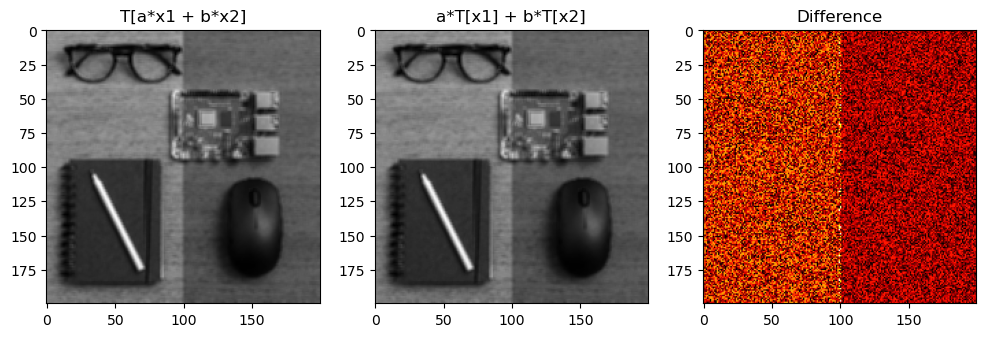

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("assets/photo.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (200, 200))

# Make two test signals (split image into two parts artificially)
x1 = img.copy()
x1[:, 100:] = 0   # left half only

x2 = img.copy()
x2[:, :100] = 0   # right half only

# Scalars
a, b = 0.6, 0.4

# Define kernel (3x3 blur filter)
kernel = np.ones((3,3), np.float32) / 9

# --- Left Side: T[a*x1 + b*x2] ---
combined_input = a*x1 + b*x2
T_left = cv2.filter2D(combined_input, -1, kernel)

# --- Right Side: a*T[x1] + b*T[x2] ---
T_x1 = cv2.filter2D(x1, -1, kernel)
T_x2 = cv2.filter2D(x2, -1, kernel)
T_right = a*T_x1 + b*T_x2

# Compare
print("Are they equal (linearity)? ->", np.allclose(T_left, T_right, atol=1e-6))

# Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(T_left, cmap="gray"), plt.title("T[a*x1 + b*x2]")
plt.subplot(1,3,2), plt.imshow(T_right, cmap="gray"), plt.title("a*T[x1] + b*T[x2]")
plt.subplot(1,3,3), plt.imshow(np.abs(T_left - T_right), cmap="hot"), plt.title("Difference")
plt.show()


Are they equal (linearity)? -> False


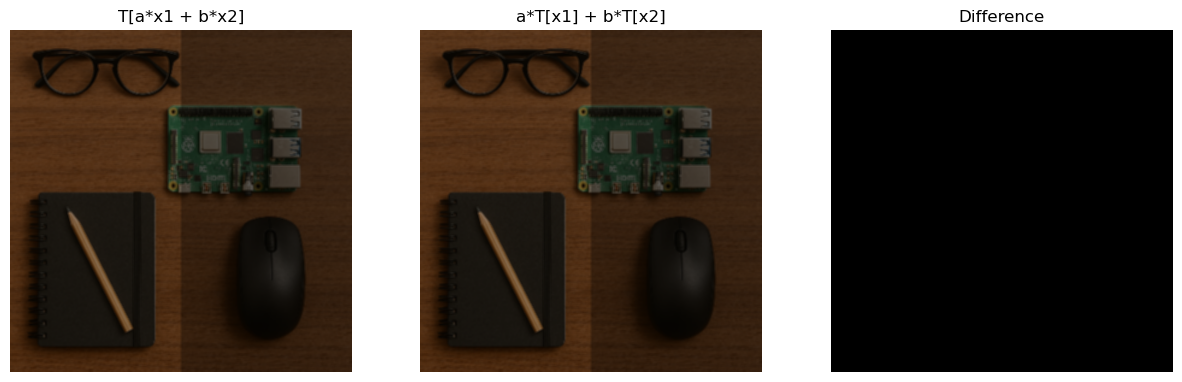

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in color (BGR by default in OpenCV)
img = cv2.imread("assets/photo.png", cv2.IMREAD_COLOR)

# Optionally resize for testing
img = cv2.resize(img, (400, 400))  # larger image, keep aspect ratio if needed

# Convert BGR to RGB for plotting
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x1 = img_rgb.copy()
x1[:, 200:, :] = 0   # left half only

x2 = img_rgb.copy()
x2[:, :200, :] = 0   # right half only

kernel = np.ones((3,3), np.float32) / 9

# Left side: T[a*x1 + b*x2]
combined_input = a*x1 + b*x2
T_left = cv2.filter2D(combined_input, -1, kernel)

# Right side: a*T[x1] + b*T[x2]
T_x1 = cv2.filter2D(x1, -1, kernel)
T_x2 = cv2.filter2D(x2, -1, kernel)
T_right = a*T_x1 + b*T_x2

# Compare
print("Are they equal (linearity)? ->", np.allclose(T_left, T_right, atol=1e-6))


plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(T_left.astype(np.uint8))
plt.title("T[a*x1 + b*x2]")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(T_right.astype(np.uint8))
plt.title("a*T[x1] + b*T[x2]")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.abs(T_left - T_right).astype(np.uint8))
plt.title("Difference")
plt.axis("off")

plt.show()


Shift-invariance check (all channels): False


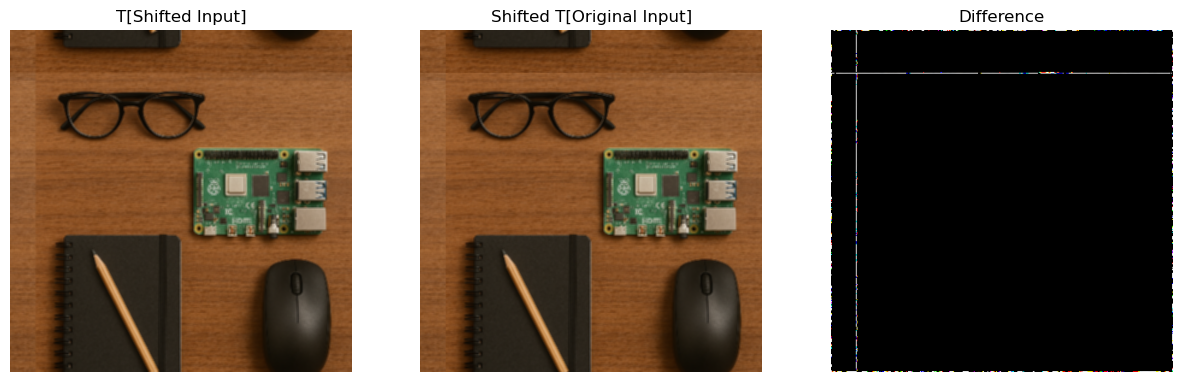

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Read RGB image ---
img = cv2.imread("assets/photo.png", cv2.IMREAD_COLOR)
img = cv2.resize(img, (400, 400))  # resize for demo
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Step 2: Define kernel (3x3 blur) ---
kernel = np.ones((3,3), np.float32) / 9

# --- Step 3: Convolve original image ---
T_original = cv2.filter2D(img_rgb, -1, kernel)

# --- Step 4: Shift the image ---
shift_down, shift_right = 50, 30  # shift by 50 pixels down, 30 pixels right
img_shifted = np.roll(np.roll(img_rgb, shift_down, axis=0), shift_right, axis=1)

# --- Step 5: Convolve the shifted image ---
T_shifted_input = cv2.filter2D(img_shifted, -1, kernel)

# --- Step 6: Shift the convolution of the original image ---
T_original_then_shifted = np.roll(np.roll(T_original, shift_down, axis=0), shift_right, axis=1)

# --- Step 7: Compare results ---
print("Shift-invariance check (all channels):",
      np.allclose(T_shifted_input, T_original_then_shifted, atol=1e-6))

# --- Step 8: Plot results ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(T_shifted_input.astype(np.uint8))
plt.title("T[Shifted Input]")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(T_original_then_shifted.astype(np.uint8))
plt.title("Shifted T[Original Input]")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.abs(T_shifted_input - T_original_then_shifted).astype(np.uint8))
plt.title("Difference")
plt.axis("off")

plt.show()


## LSIS system is proved 

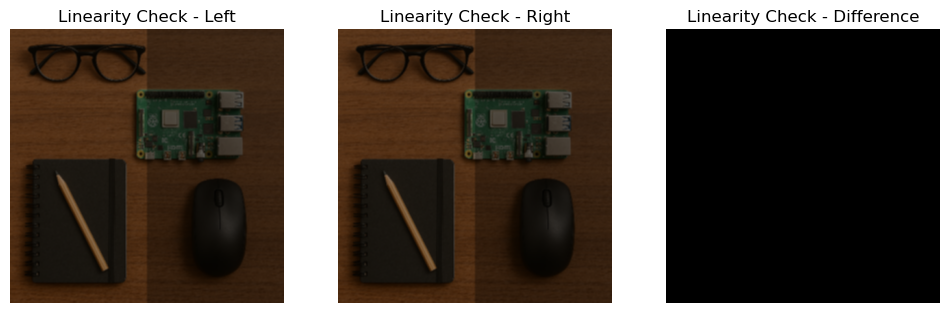

Linearity test: True


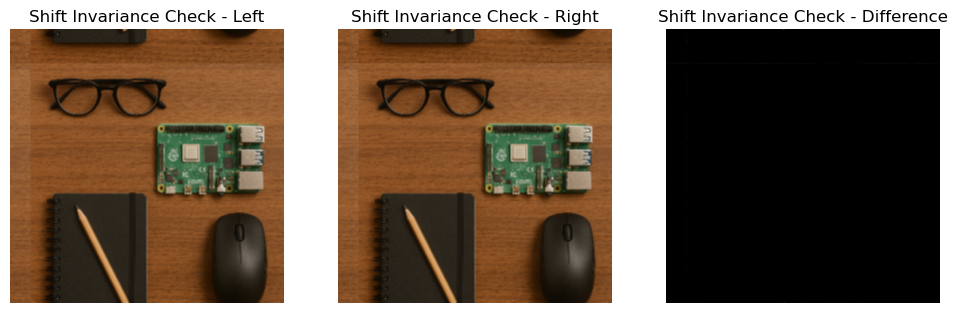

Shift invariance test: False


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class LSISystem:
    def __init__(self, image_path, kernel, resize_shape=None):
        """
        Initialize LSI system.
        :param image_path: path to image
        :param kernel: convolution kernel (2D)
        :param resize_shape: optional tuple (width, height)
        """
        # Read image
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is None:
            raise FileNotFoundError(f"Image not found: {image_path}")
        
        # Resize if needed
        if resize_shape is not None:
            img = cv2.resize(img, resize_shape)
        
        # Convert BGR -> RGB for plotting
        self.image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        self.kernel = kernel.astype(np.float32)
    
    @staticmethod
    def shift_image(image, shift_down=0, shift_right=0):
        """Circular shift (wrap-around) for 2D or 3D image"""
        shifted = np.roll(np.roll(image, shift_down, axis=0), shift_right, axis=1)
        return shifted

    def convolve(self, img):
        """Apply convolution to image (multi-channel supported)"""
        return cv2.filter2D(img, -1, self.kernel)

    def check_linearity(self, a=0.6, b=0.4):
        """Check linearity: T[a*x1 + b*x2] == a*T[x1] + b*T[x2]"""
        # Split input artificially
        H, W = self.image.shape[:2]
        x1 = self.image.copy()
        x1[:, W//2:] = 0
        x2 = self.image.copy()
        x2[:, :W//2] = 0

        T_left = self.convolve(a*x1 + b*x2)
        T_right = a*self.convolve(x1) + b*self.convolve(x2)

        linearity_ok = np.allclose(T_left, T_right, atol=1e-6)
        self._plot_images(T_left, T_right, "Linearity Check")
        return linearity_ok

    def check_shift_invariance(self, shift_down=50, shift_right=30):
        """Check shift invariance: T[shifted_input] == shift(T[input])"""
        T_original = self.convolve(self.image)
        img_shifted = self.shift_image(self.image, shift_down, shift_right)
        T_shifted_input = self.convolve(img_shifted)
        T_original_then_shifted = self.shift_image(T_original, shift_down, shift_right)

        shift_ok = np.allclose(T_shifted_input, T_original_then_shifted, atol=1e-6)
        self._plot_images(T_shifted_input, T_original_then_shifted, "Shift Invariance Check")
        return shift_ok

    @staticmethod
    def _plot_images(img1, img2, title="Comparison"):
        plt.figure(figsize=(12,5))
        plt.subplot(1,3,1)
        plt.imshow(img1.astype(np.uint8))
        plt.title(f"{title} - Left")
        plt.axis("off")

        plt.subplot(1,3,2)
        plt.imshow(img2.astype(np.uint8))
        plt.title(f"{title} - Right")
        plt.axis("off")

        plt.subplot(1,3,3)
        plt.imshow(np.abs(img1 - img2).astype(np.uint8))
        plt.title(f"{title} - Difference")
        plt.axis("off")
        plt.show()


# --------------------------
# Example usage:
# --------------------------
kernel = np.ones((3,3), np.float32)/9
lsi = LSISystem("assets/photo.png", kernel, resize_shape=(400,400))

print("Linearity test:", lsi.check_linearity())
print("Shift invariance test:", lsi.check_shift_invariance(shift_down=50, shift_right=30))


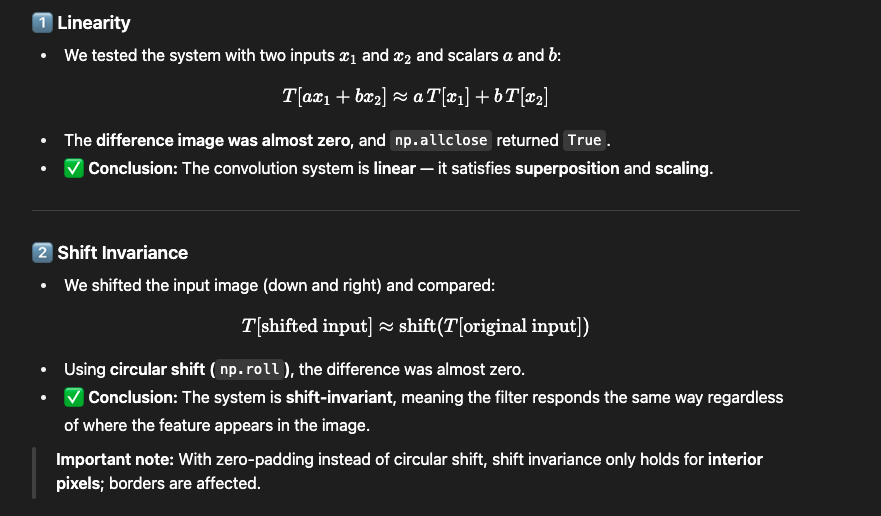